In [1]:
import torch
from cnn import CNN


model = CNN(1, 10)
model.load_state_dict(torch.load('../checkpoints/model.pth'))

/home/hesam/miniconda3/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


<All keys matched successfully>

In [135]:
# get number of learnable parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.numel())

conv.weight 288
conv.bias 32
fc.weight 11520
fc.bias 10


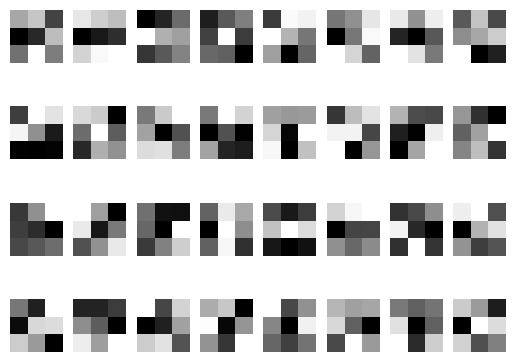

In [2]:
import matplotlib.pyplot as plt


for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(model.conv.weight.data[i][0].numpy(), cmap='gray')
    plt.axis('off')
plt.show()

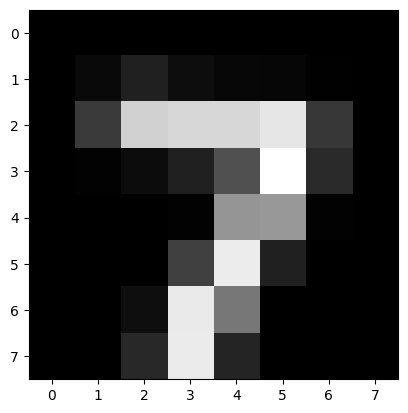

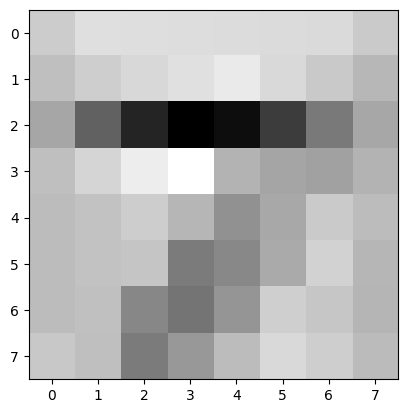

In [37]:
import torchvision
from torchvision import transforms
import scipy.signal as signal


conv = torch.nn.Conv2d(1, 1, 3, stride=1)
conv.weight.data = model.conv.weight.data[1]
conv_kernel = conv.weight.data.squeeze().numpy()

image_size = (8, 8)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,)), transforms.Resize(image_size, antialias=True)])

dataset     = torchvision.datasets.MNIST('data', train=False, download=True, transform=transform)
image, _    = dataset[0]
image = image.squeeze().numpy()


plt.imshow(image, cmap='gray')
plt.show()

output = signal.convolve2d(image, conv_kernel, mode='same', fillvalue=0)
plt.imshow(output, cmap='gray')

In [21]:
# from torch.utils.data import DataLoader


# dataset = torchvision.datasets.MNIST('./data', train=False, download=True, transform=transform)
# loader = DataLoader(dataset, batch_size=32, shuffle=True)

# model.eval()
# model.cuda()

# correct = 0
# total = 0
# with torch.no_grad():
#     for image, label in loader:
#         image = image.cuda()
#         label = label.cuda()
#         output = model(image)
#         _, predicted = torch.max(output, 1)
#         total += label.size(0)
#         correct += (predicted == label).sum().item()
#         break

In [22]:
# import torch.nn.functional as F


# sample = image[0]
# plt.imshow(sample.cpu().numpy().squeeze(), cmap='gray')
# plt.show()
# out = model.conv(sample.unsqueeze(0))
# print(out.size())
# out = F.relu(out)
# out = out.view(-1, out.size(1)*out.size(2)*out.size(3))
# print(out.size())
# out = model.fc(out)
# print(out.size())
# out = F.softmax(out, dim=1)
# # out to probability

# torch.argmax(out)
# out = out.cpu().detach().numpy().squeeze()
# plt.bar(range(10), out)
# plt.show()

In [15]:
from utils import image_to_adj
import numpy as np


adj = image_to_adj(np.zeros((8, 8)))
adj = np.array(adj)
vals = [sum(adj[i]) for i in range(len(adj))]
set(vals)

{4.0, 6.0, 9.0}

In [5]:
list(model.conv.parameters())[1]

Parameter containing:
tensor([-0.2275, -0.2925, -0.3112, -0.3395, -0.1875, -0.2947, -0.2062, -0.3511,
        -0.0943, -0.1705, -0.0964, -0.1976, -0.2056, -0.0955, -0.5994,  0.0962,
        -0.2289, -0.4609, -0.4333, -0.2400, -0.0641, -0.0715, -0.3015,  0.0425,
        -0.0393, -0.3415, -0.1181, -0.5764, -0.2512, -0.2655, -0.5570, -0.0973],
       requires_grad=True)

In [16]:
coeff = adj.copy()

h, w = np.sqrt(adj.shape[0]).astype(int), np.sqrt(adj.shape[0]).astype(int)

for i in range(w):
    for j in range(h):
        kernel_counter = 0
        for ii in range(i-1, i+2):
            for jj in range(j-1, j+2):
                if 0 <= ii < w and 0 <= jj < h:
                    coeff[i * h + j, ii * h + jj] = conv_kernel.flatten()[kernel_counter]
                kernel_counter += 1

In [48]:
image_size = 4
temp_kernel = np.random.rand(3, 3)
print(temp_kernel)
a = image_to_adj(np.zeros((image_size, image_size)), temp_kernel)
print(a[6])

[[0.71350666 0.17612697 0.75112341]
 [0.59231997 0.16273123 0.71185024]
 [0.81141397 0.0360106  0.23194077]]
tensor([0.0000, 0.7135, 0.1761, 0.7511, 0.0000, 0.5923, 0.1627, 0.7119, 0.0000,
        0.8114, 0.0360, 0.2319, 0.0000, 0.0000, 0.0000, 0.0000])


In [10]:
# w = 4
# for i in range(w):
#     for j in range(w):
#         kernel_counter = 0
#         for ii in range(i-1, i+2):
#             for jj in range(j-1, j+2):
#                 if 0 <= ii < w and 0 <= jj < w:
#                     print(i * h + j, ii * h + jj)
                    
#                 kernel_counter += 1

[-5 -4 -3 -1  0  1  3  4  5]


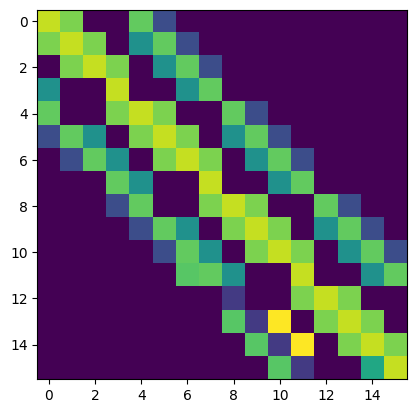

In [41]:
import numpy as np

image_size = 4
temp_kernel = np.random.rand(3, 3)
a = image_to_adj(np.zeros((image_size, image_size)), temp_kernel)
# a = a * np.random.rand(image_size**2, image_size**2)
# set line width
# plt.rcParams['lines.linewidth'] = 0.5
# for i in range(image_size**2):
#     for j in range(image_size**2):
#         plt.axvline(i, 0, image_size**2, color='b')
#         plt.axhline(j, 0, image_size**2, color='b')

# for i in range(image_size**2):

d = np.array([-1, 0, 1])
left = d - image_size
right = d + image_size
d = np.append(left, d)
d = np.append(d, right)
print(d)
for i in range(image_size**2):
    for j in range(image_size):
        if 0 <= i + d[j] < image_size**2 and 0 <= i - d[j] < image_size**2:
            a[i, i+d[j]] = a[i, i-d[j]]

    
plt.imshow(a)

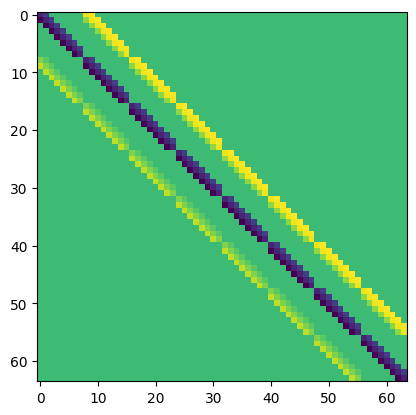

In [17]:
plt.imshow(coeff)


In [27]:
torch.tensor(image.flatten()).unsqueeze(1).shape

torch.Size([64, 1])

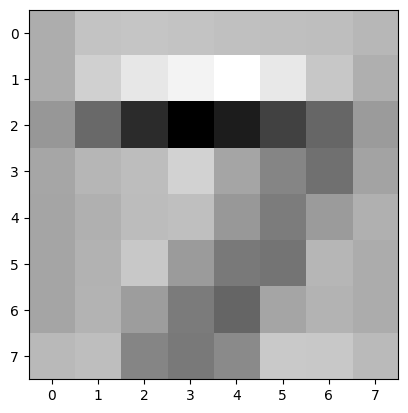

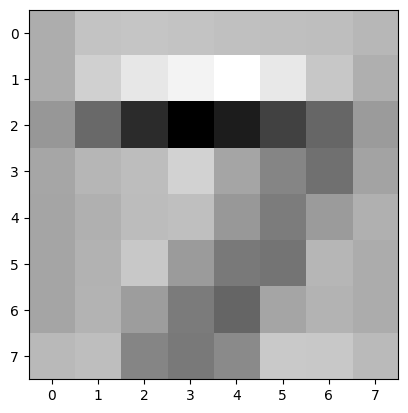

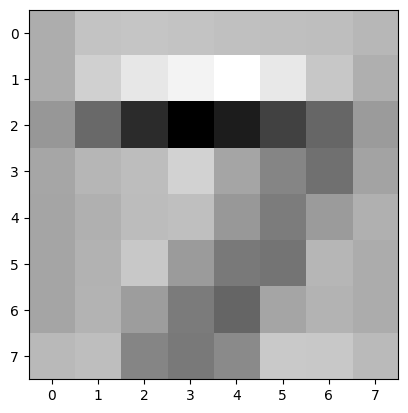

the outputs are the same:  True
Elapsed time for sparse csr matrix multiplication: 1.7281103134155275e-05
Elapsed time for sparse coo matrix multiplication: 6.20732307434082e-06
Elapsed time for convolution: 1.4697313308715821e-05
sparse conv is 2.367737772417555 times faster than regular conv


In [171]:
# benchmark the time it takes to do the matrix multiplication for iters images
import time
import torch

coeff_sparse = torch.tensor(coeff, dtype=torch.float32)
i = torch.nonzero(coeff_sparse, as_tuple=False).T
v = coeff_sparse[i[0], i[1]]
coeff_coo_sparse = torch.sparse_coo_tensor(i, v, size=coeff_sparse.shape, requires_grad=True)
# convert coo to csr
coeff_csr_sparse = coeff_sparse.to_sparse_csr()


image_torch = torch.tensor(image.flatten()).unsqueeze(1)

iters = 10000


# benchmark the time it takes to do the convolution for iters images
image_torch = torch.tensor(image).unsqueeze(0).unsqueeze(0)
torch_conv = torch.nn.Conv2d(1, 1, 3, stride=1, padding=1, bias=False)
torch_conv.weight.data = torch.tensor(conv_kernel).unsqueeze(0).unsqueeze(0).float()
start = time.time()
for i in range(iters):
    out = torch_conv(image_torch)
elapsed = time.time() - start
elapsed = elapsed / iters
out = out.squeeze().detach().numpy()

image_torch = torch.tensor(image.flatten()).unsqueeze(1)

start = time.time()
for i in range(iters):
    sparse_out = torch.sparse.mm(coeff_csr_sparse, image_torch)
    # out = out.numpy().reshape(8, 8)
sparse_csr_elapsed = time.time() - start
sparse_csr_elapsed = sparse_csr_elapsed / iters
sparse_csr_out = sparse_out.detach().numpy().reshape(8, 8)
plt.imshow(sparse_csr_out, cmap='gray')
plt.show()

start = time.time()
for i in range(iters):
    sparse_out = torch.sparse.mm(coeff_coo_sparse, image_torch)
    # out = out.numpy().reshape(8, 8)
sparse_coo_elapsed = time.time() - start
sparse_coo_elapsed = sparse_coo_elapsed / iters
sparse_coo_out = sparse_out.detach().numpy().reshape(8, 8)
plt.imshow(sparse_coo_out, cmap='gray')
plt.show()


plt.imshow(out, cmap='gray')
plt.show()
print("the outputs are the same: ", np.allclose(sparse_csr_out, out))
print(f'Elapsed time for sparse csr matrix multiplication: {sparse_csr_elapsed}')
print(f'Elapsed time for sparse coo matrix multiplication: {sparse_coo_elapsed}')
print(f'Elapsed time for convolution: {elapsed}')
print(f'sparse conv is {elapsed/sparse_coo_elapsed} times faster than regular conv')

In [ ]:
a = torch.nn.Conv2d(1, 1, 3, stride=1, padding=1)

list(a.parameters())[1]

Parameter containing:
tensor([0.2651], requires_grad=True)